<a href="https://colab.research.google.com/github/Ani3103/Ani3103/blob/main/2(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn rate.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Data Preprocessing
#numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Convert 'TotalCharges' to numeric (some values might be non-numeric due to formatting issues)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handling missing values (if any)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

df = df.dropna(subset=['Churn'])
#standardization
scaler = StandardScaler()
df['SeniorCitizen'] = scaler.fit_transform(df['SeniorCitizen'].to_numpy().reshape(-1,1))
scaler = StandardScaler()
df['tenure'] = scaler.fit_transform(df['tenure'].to_numpy().reshape(-1,1))
scaler = StandardScaler()
df['MonthlyCharges'] = scaler.fit_transform(df['MonthlyCharges'].to_numpy().reshape(-1,1))

# Label encoding for categorical variables
le = LabelEncoder()
df['customerID'] = le.fit_transform(df['customerID'])
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
le=LabelEncoder()
df['Partner']= le.fit_transform(df['Partner'])
le = LabelEncoder()
df['Dependents']= le.fit_transform(df['Dependents'])
le = LabelEncoder()
df['PhoneService']= le.fit_transform(df['PhoneService'])
le = LabelEncoder()
df['MultipleLines']= le.fit_transform(df['MultipleLines'])
le = LabelEncoder()
df['InternetService']= le.fit_transform(df['InternetService'])
le = LabelEncoder()
df['OnlineSecurity']= le.fit_transform(df['OnlineSecurity'])
le = LabelEncoder()
df['DeviceProtection']= le.fit_transform(df['DeviceProtection'])
le = LabelEncoder()
df['TechSupport']= le.fit_transform(df['TechSupport'])
le = LabelEncoder()
df['StreamingTV']= le.fit_transform(df['StreamingTV'])
le = LabelEncoder()
df['StreamingMovies']= le.fit_transform(df['StreamingMovies'])
le = LabelEncoder()
df['Contract']= le.fit_transform(df['Contract'])
le = LabelEncoder()
df['PaperlessBilling']= le.fit_transform(df['PaperlessBilling'])
le = LabelEncoder()
df['PaymentMethod']= le.fit_transform(df['PaymentMethod'])
le = LabelEncoder()
df['Churn']= le.fit_transform(df['Churn'])
le = LabelEncoder()
df['OnlineBackup']= le.fit_transform(df['OnlineBackup'])

#Standardize numeric columns
#scaler = StandardScaler()
#df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,-0.439916,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,29.85,0
1,3962,1,-0.439916,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,1889.50,0
2,2564,1,-0.439916,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,108.15,1
3,5535,1,-0.439916,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,1840.75,0
4,6511,0,-0.439916,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,-0.439916,1,1,-0.340876,1,2,0,2,...,2,2,2,2,1,1,3,0.665992,1990.50,0
7039,1525,0,-0.439916,1,1,1.613701,1,2,1,0,...,2,0,2,2,1,1,1,1.277533,7362.90,0
7040,3367,0,-0.439916,1,1,-0.870241,0,1,0,2,...,0,0,0,0,0,1,2,-1.168632,346.45,0
7041,5934,1,2.273159,1,0,-1.155283,1,2,1,0,...,0,0,0,0,0,1,3,0.320338,306.60,1


In [ ]:
df1 = df[df["TotalCharges"]!= ' ']

df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])

df1["TotalCharges"] = pd.to_numeric(df1["TotalCharges"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

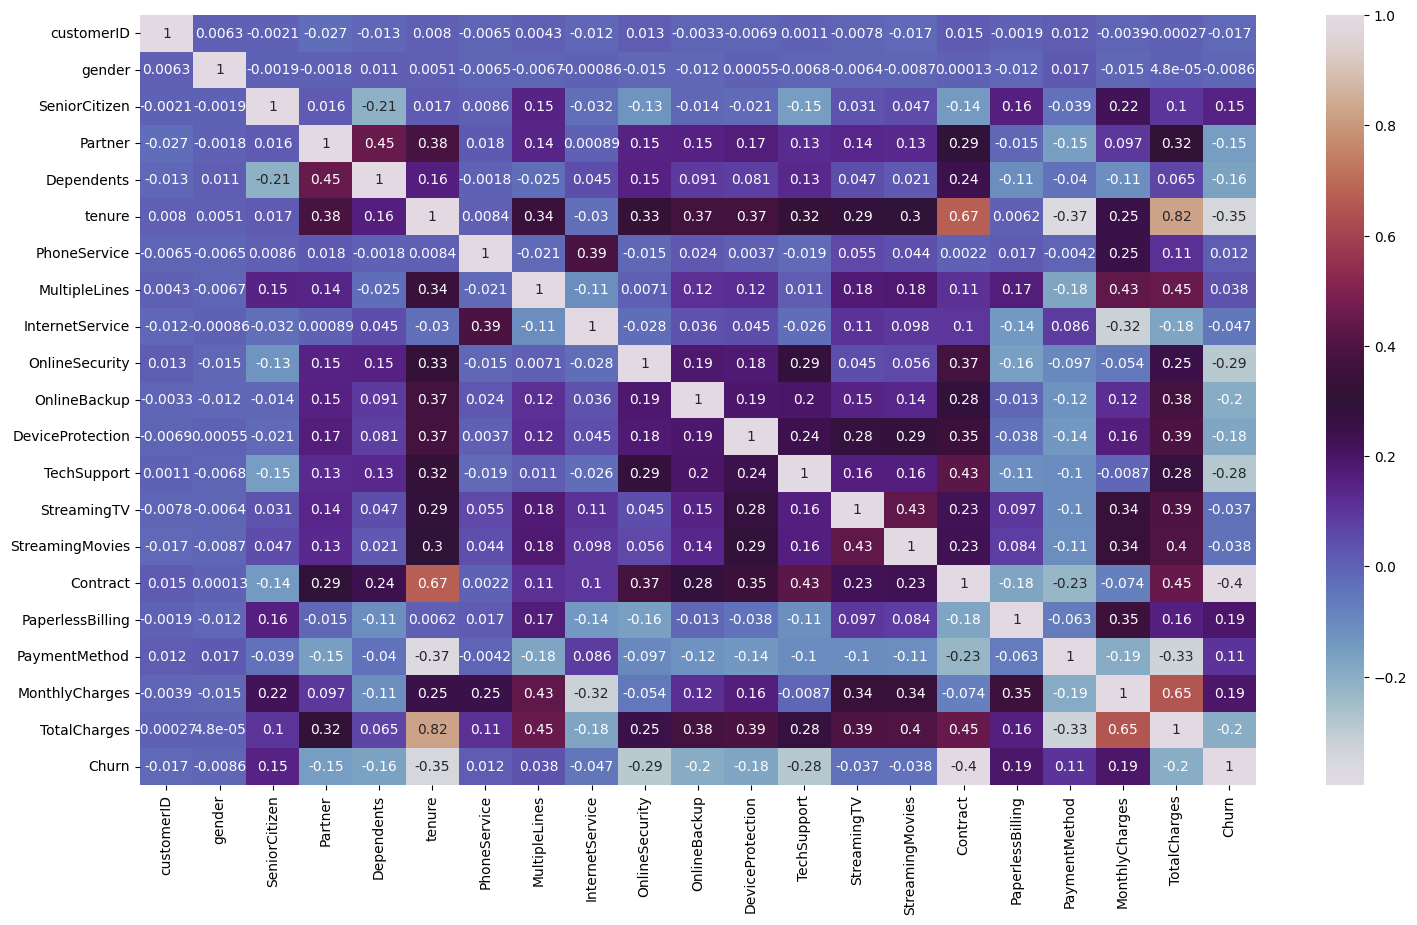

In [ ]:
correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight')
plt.show()

In [ ]:
# plot a stacked bar chart for PhoneService, MultipleLines, InternetService, OnlineSecurity,OnlineBackup, DeviceProtection, TechSupport,	StreamingTV	, StreamingMovies in the dataset

# Create the stacked bar chart
df = df.groupby(['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies']).size().unstack().fillna(0)
df.plot(kind='bar', stacked=True, figsize=(30, 20))

# Add title and labels
plt.title('Stacked Bar Chart for PhoneService, MultipleLines, InternetService, OnlineSecurity,\nOnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies')
plt.xlabel('Features')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


KeyError: 'StreamingMovies'

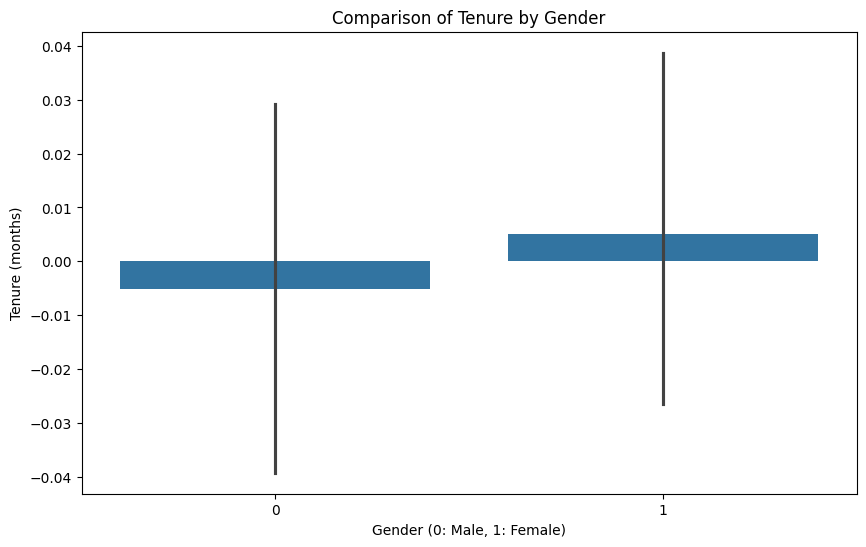

In [ ]:
#plot comparing gender and tenure

# Bar plot comparing gender and tenure
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='tenure', data=df)
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Tenure (months)')
plt.title('Comparison of Tenure by Gender')
plt.show()


# Feature selection

In [ ]:
print(df['Churn'].unique())

In [ ]:
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
#df['Churn'] = df['Churn'].map({-0.601023: 0, 1.663829: 1})
x = df.drop('Churn', axis=1)
y = df['Churn']
y

In [ ]:
# Applying LASSO
lasso = LassoCV(cv=5, random_state=0).fit(x, y)

#feature names
feature_names = np.array(x.columns)

# selected features
selected_features = feature_names[(lasso.coef_ != 0).ravel().tolist()]

print("Selected features: ", selected_features)


In [ ]:

x_train_selected = x[selected_features]

x_test = x[selected_features]
x_train, x_test, y_train, y_test = train_test_split(x_train_selected, y, test_size=0.2, random_state=42)

In [ ]:
model= LogisticRegression()

model = LogisticRegression()
model.fit(x_train, y_train)




In [ ]:
model.predict(x_test)
p=np.array(model.predict(x_test))
print(model.predict(x_test))

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Usage:
probabilities = sigmoid(p)
probabilities

In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, p)
accuracy